#  Name - Riddhesh Awade
## OIBSIP June2 TASK 1

## 1) Problem Statement

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

## 2) Data Collection

Dataset Source-https://www.kaggle.com/datasets/saurabh00007/iriscsv

### 2.1 import Data and Required Packages

In [8]:
#import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings('ignore')

### 2.2 Importing Datasets

In [10]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Let's get stastical information about the dataset

In [11]:
#number of rows and columns
df.shape

(150, 6)

In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 3. Data Checks to perform

- Check Missing Values
- Check the number of unique values of each column
- Check data type
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [13]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in the data set.

### 3.2 Checking the number of unique values of each column

In [14]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [15]:
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 3.3 Check data types

In [16]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### 3.4 Check Statistics of data set

In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 4. Exploring Data (Visualization)

### Heat Map

<Axes: >

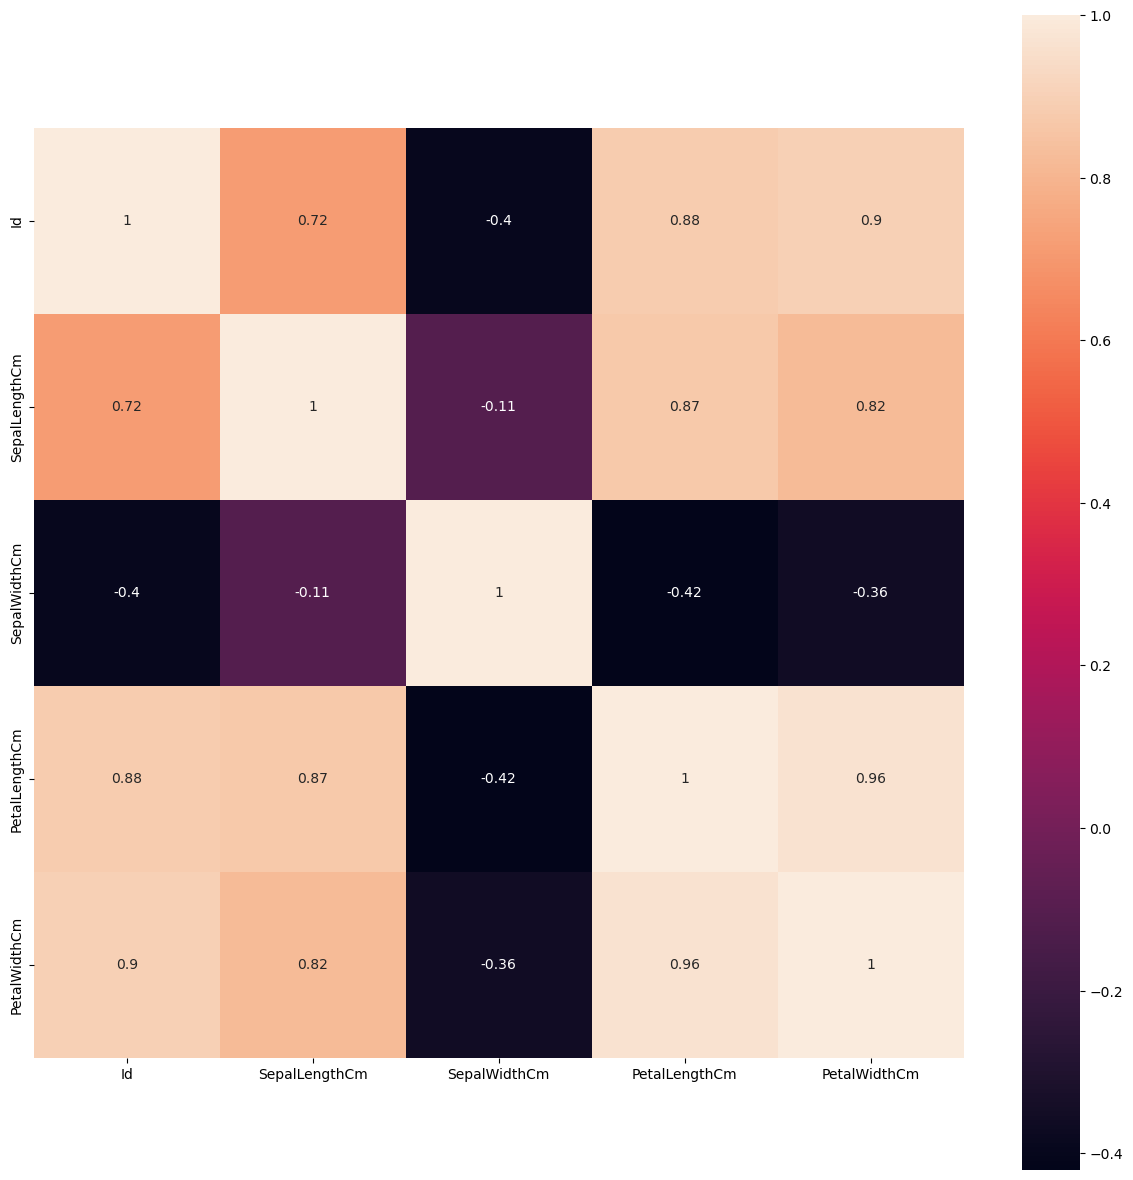

In [18]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

### Box-Plot

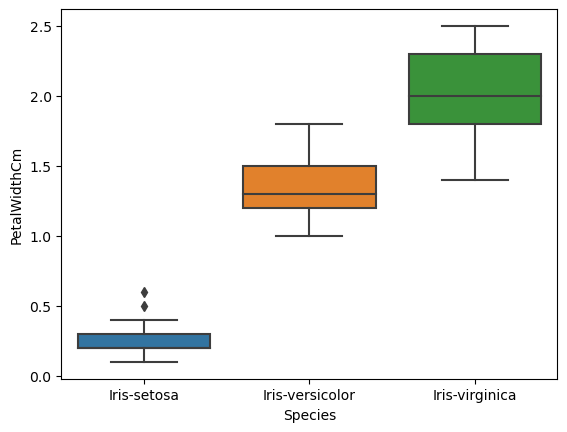

In [19]:
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

### Finding optimal number of clusters(Elbow method)

In [20]:
x = df.iloc[:, [1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

cluster_range = range(1,11)
for i in cluster_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

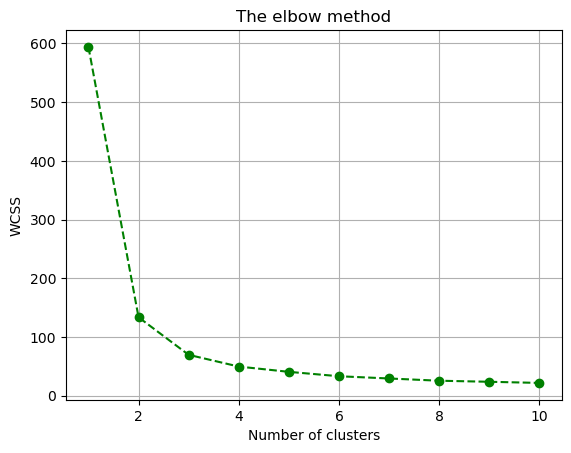

In [21]:
plt.plot(cluster_range, wcss, 'go--',color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

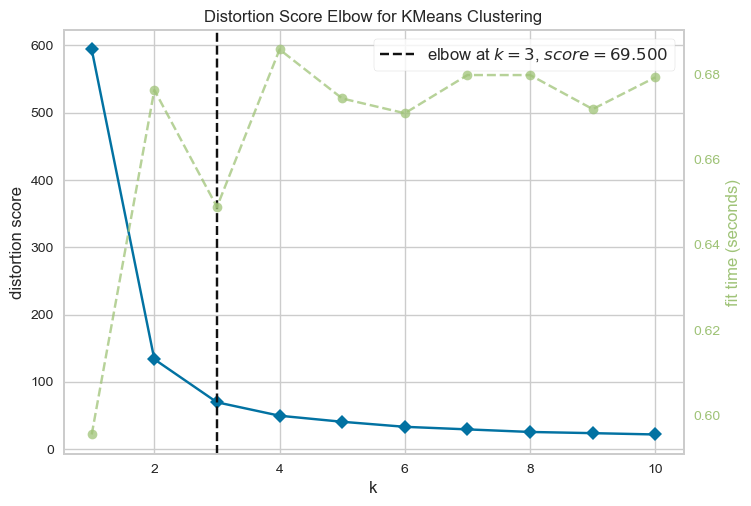

In [22]:
from yellowbrick.cluster import KElbowVisualizer as ev
elbow=ev(kmeans,k=range(1,11))
elbow.fit(x)
elbow.poof()
plt.show()

From this we can choose **Number of cluster as 3**

### Applying k-means clustering on data

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

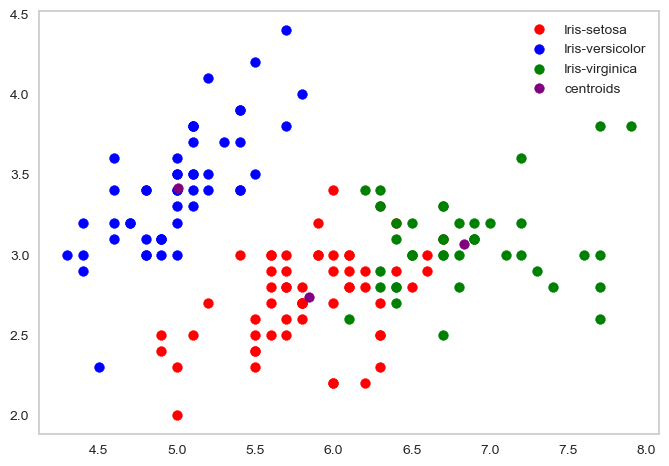

In [24]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'purple', label = 'centroids')

plt.legend()
plt.grid()
